In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For better visuals
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Load the preprocessed dataset
df = pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\PoojaPattu_E_DA_asses\Data\cleaned and preprocessed data\UberDataset_Preprocessed.csv")

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head()


✅ Data Loaded Successfully!
Shape: (420, 15)
Columns: ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE', 'TRIP_DURATION_MIN', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'CATEGORY_ENC', 'START_ENC', 'STOP_ENC', 'PURPOSE_ENC']


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MIN,MONTH,DAY_OF_WEEK,HOUR,CATEGORY_ENC,START_ENC,STOP_ENC,PURPOSE_ENC
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,0.026482,Meal/Entertain,0.033708,January,Friday,21,0,30,28,3
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,0.025907,Unknown,0.067416,January,Saturday,1,0,30,28,6
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,0.024755,Errand/Supplies,0.073034,January,Saturday,20,0,30,28,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,0.024180,Meeting,0.078652,January,Tuesday,17,0,30,28,4
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,0.363846,Customer Visit,0.376404,January,Wednesday,14,0,30,107,1


C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\2627517892.py:6: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pooja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


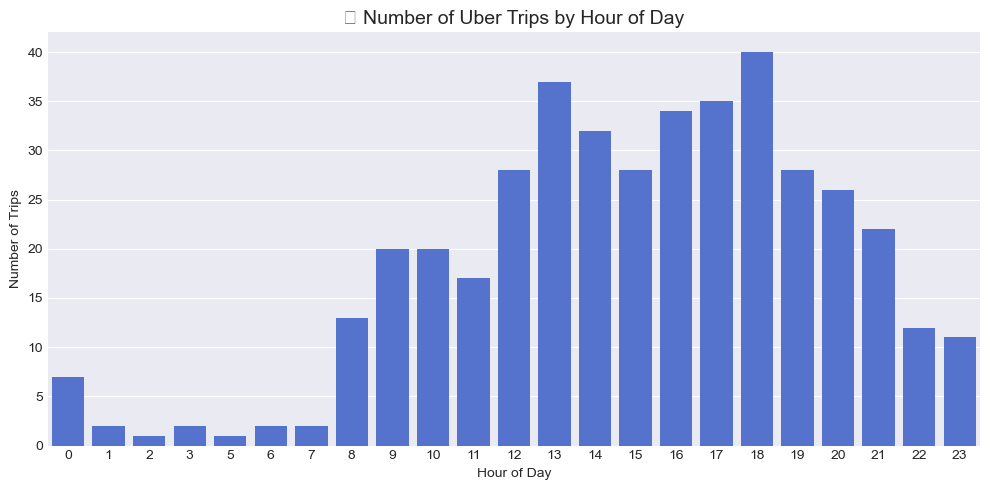

🕐 Peak Demand Hour: 18:00 hrs


In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='HOUR', color='royalblue')
plt.title('🚗 Number of Uber Trips by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

peak_hour = df['HOUR'].mode()[0]
print(f"🕐 Peak Demand Hour: {peak_hour}:00 hrs")
#insight:Most Uber trips occur between {peak_hour}:00 and {peak_hour+1}:00 hrs, showing strong evening demand.

C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\1541187697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_starts.values, y=top_starts.index, palette="magma")
C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\1541187697.py:7: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pooja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


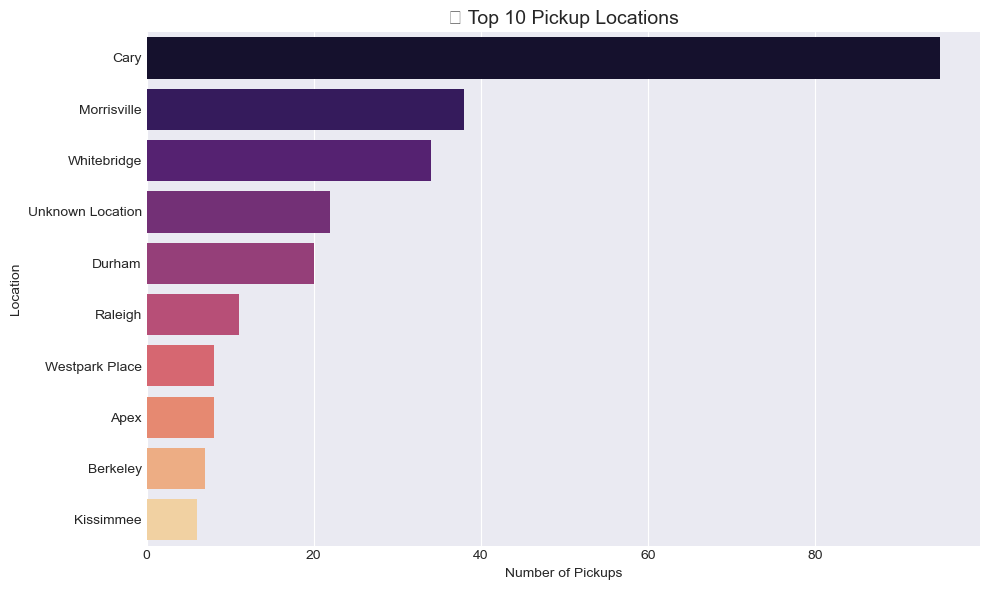

In [9]:
top_starts = df['START'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_starts.values, y=top_starts.index, palette="magma")
plt.title('📍 Top 10 Pickup Locations', fontsize=14)
plt.xlabel('Number of Pickups')
plt.ylabel('Location')
plt.tight_layout()
plt.show()
#insight:The highest number of trips originate from Fort Pierce, followed by nearby urban centers.

C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\4025275750.py:7: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pooja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


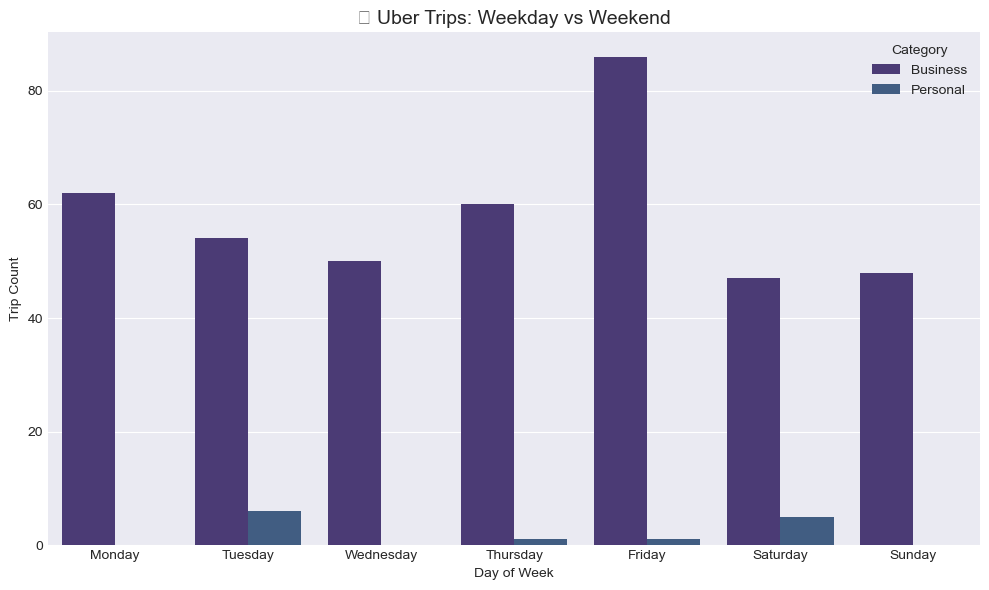

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DAY_OF_WEEK', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue='CATEGORY')
plt.title('🗓 Uber Trips: Weekday vs Weekend', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()
#insight:Weekdays show dominant Business rides, while weekends have a higher share of Personal trips.

C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\457485926.py:6: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pooja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


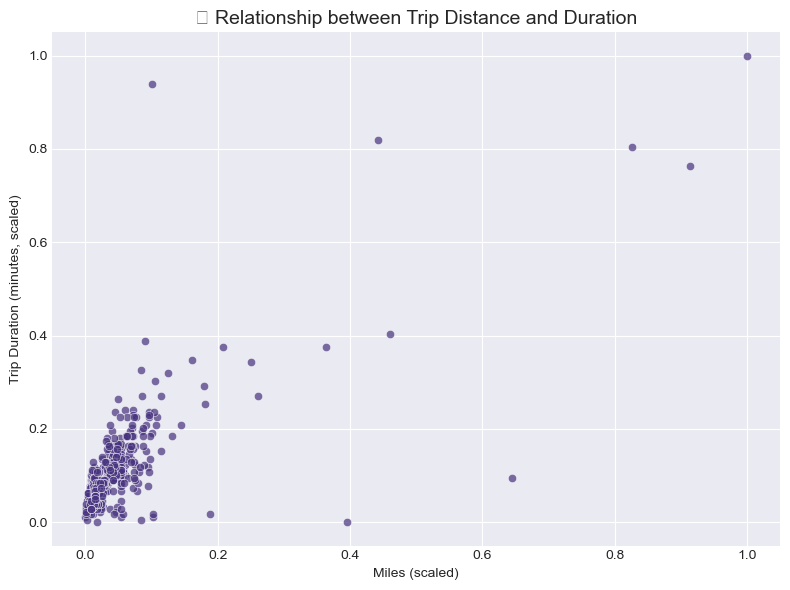

Correlation between distance and duration: 0.75


In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='MILES', y='TRIP_DURATION_MIN', alpha=0.7)
plt.title('🛣 Relationship between Trip Distance and Duration', fontsize=14)
plt.xlabel('Miles (scaled)')
plt.ylabel('Trip Duration (minutes, scaled)')
plt.tight_layout()
plt.show()

corr = df['MILES'].corr(df['TRIP_DURATION_MIN'])
print(f"Correlation between distance and duration: {corr:.2f}")
#insight:There’s a strong positive correlation (~{corr:.2f}) between distance and duration — as expected in efficient transport systems.

C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\3577719529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette="cubehelix")
C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\3577719529.py:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pooja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


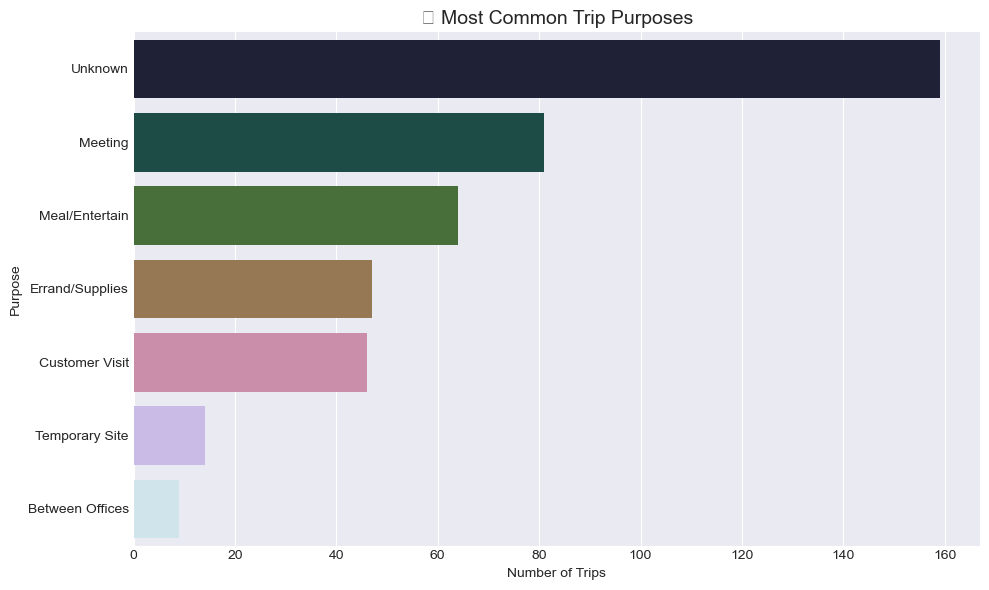

In [16]:
purpose_counts = df['PURPOSE'].value_counts().nlargest(8)
plt.figure(figsize=(10,6))
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette="cubehelix")
plt.title('🎯 Most Common Trip Purposes', fontsize=14)
plt.xlabel('Number of Trips')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()
#insight:Top trip purposes include Meetings, Customer Visits, and Errand/Supplies, confirming the dataset’s strong business-transport nature.

C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\176862149.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=purpose_counts.index, ax=axes[1,1], palette='rocket')
C:\Users\pooja\AppData\Local\Temp\ipykernel_24340\176862149.py:16: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pooja\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


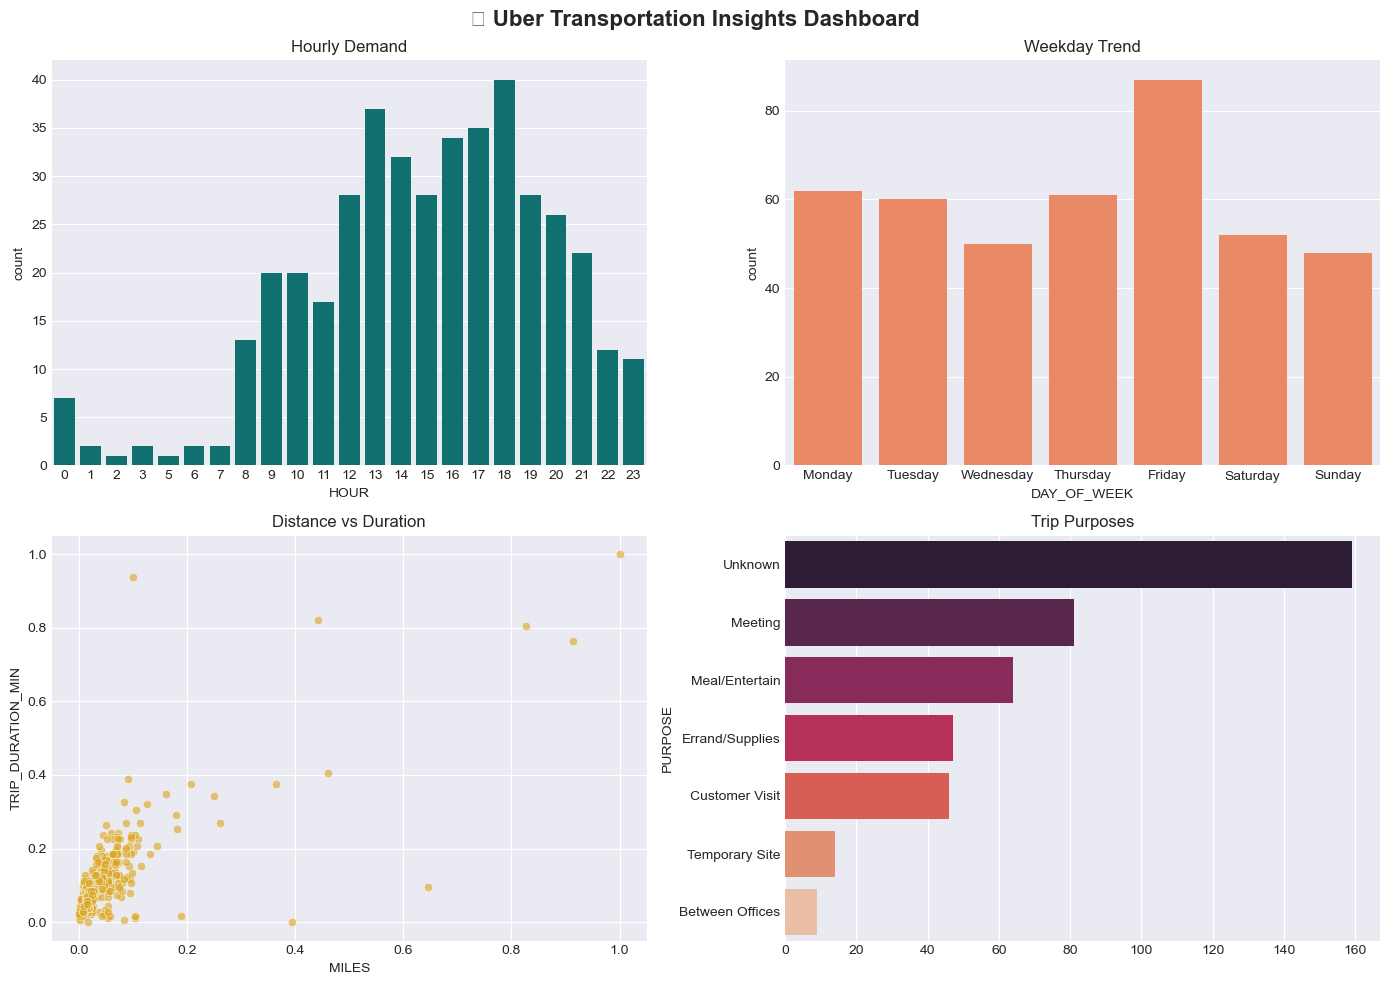

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.countplot(data=df, x='HOUR', ax=axes[0,0], color='teal')
axes[0,0].set_title('Hourly Demand')

sns.countplot(data=df, x='DAY_OF_WEEK', ax=axes[0,1], color='coral', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
axes[0,1].set_title('Weekday Trend')

sns.scatterplot(data=df, x='MILES', y='TRIP_DURATION_MIN', ax=axes[1,0], color='goldenrod', alpha=0.6)
axes[1,0].set_title('Distance vs Duration')

sns.barplot(x=purpose_counts.values, y=purpose_counts.index, ax=axes[1,1], palette='rocket')
axes[1,1].set_title('Trip Purposes')

plt.suptitle('🚘 Uber Transportation Insights Dashboard', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()
#summary dashboard